# Model Training

In [1]:
import pandas as pd
import ast
import warnings
import os
warnings.filterwarnings("ignore")
import sys
sys.path.append('../')
from utils.machine_learning import DataPreprocess, ModelTraining, MetricsVisualizations

In [2]:
preprocess = DataPreprocess()
trainer = ModelTraining()

# Data

In [3]:
df_onehot = pd.read_csv("./Data/ml_dataset_onehot.csv")
df_label = pd.read_csv("./Data/ml_dataset_label.csv")

In [4]:
df_onehot.head()

,released_year,certificate,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,gross_per_vote
0,1972,adults,175,"['crime', 'drama']",9.2,100.0,few_movies,few_movies,few_movies,one_movie,few_movies,1620367,134966411.0,83.293730
1,2008,watch_with_parents,152,"['action', 'crime', 'drama']",9.0,84.0,multiple_movies,multiple_movies,few_movies,one_movie,few_movies,2303232,534858444.0,232.220829
2,1974,adults,202,"['crime', 'drama']",9.0,90.0,few_movies,multiple_movies,few_movies,few_movies,few_movies,1129952,57300000.0,50.710119
3,1957,all_ages,96,"['crime', 'drama']",9.0,96.0,few_movies,few_movies,one_movie,few_movies,one_movie,689845,4360000.0,6.320260
4,2003,all_ages,201,"['action', 'adventure', 'drama']",8.9,94.0,few_movies,few_movies,few_movies,one_movie,few_movies,1642758,377845905.0,230.007040


In [5]:
df_label.head()

,released_year,certificate,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,gross_per_vote
0,1972,3,175,"['crime', 'drama']",9.2,100.0,2,2,2,1,2,1620367,134966411.0,83.293730
1,2008,1,152,"['action', 'crime', 'drama']",9.0,84.0,3,3,2,1,2,2303232,534858444.0,232.220829
2,1974,3,202,"['crime', 'drama']",9.0,90.0,2,3,2,2,2,1129952,57300000.0,50.710119
3,1957,0,96,"['crime', 'drama']",9.0,96.0,2,2,1,2,1,689845,4360000.0,6.320260
4,2003,0,201,"['action', 'adventure', 'drama']",8.9,94.0,2,2,2,1,2,1642758,377845905.0,230.007040


# Preprocessing the Data

### For the preprocess step, the data will be divided into a train and test split. Also, onehot encoding will be performed on the categorical columns of the datasets, except the `genre` column, where multilabel encoding will be performed to handle the different values of lists. The numerical columns will be transformed using the log and cubic transformations, and then they will be scaled using the Robust Scaler in reason of the outliers and because the `released_year` and `meta_score` columns won't go through the statistical transformation step. The preprocessor will be saved in the **Artifacts** folder
### Also, the `genre` collumn will be stransformed into a list of strings

In [6]:
df_onehot["genre"] = df_onehot["genre"].apply(ast.literal_eval)
df_label["genre"] = df_label["genre"].apply(ast.literal_eval)

In [7]:
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = preprocess.preprocess_data(df_onehot, test_size=0.3, target_name="imdb_rating")
X_train_label, X_test_label, y_train_label, y_test_label = preprocess.preprocess_data(df_label, test_size=0.3, target_name="imdb_rating", onehot=False)

# Modeling

### For the modeling phase, four models will be used: **Ridge**, **Lasso**, **Random Forest** and **Gradient Boosting**. These models were chosen because of the non-linear relationship between the numerical columns and the target `imdb_rating`, so using Linear Regression wouldn't make any sense in this case

### After the models are trained and tested, they will be evaluated in terms of the metrics MAE and RMSE, to see the error of the models in the same unit as the prices, and R² to see how much of the variability of the data the model can explain, along with visualization of the residuals. Also, the top 5 most important features of each model will be plotted in relation to the increase in MAE, to check if any transformation, or if the feature created, was successful or not

### To train the models, a repo in DagsHub will be used, along with MLflow to keep track of all information about the models

# Model Training for one-hot encoded dataframe

In [8]:
model_report_onehot = trainer.initiate_model_trainer((X_train_onehot, y_train_onehot, X_test_onehot, y_test_onehot), "Onehot_encoded_dataset")

2024/07/08 16:44:22 INFO mlflow.tracking.fluent: Experiment with name 'Onehot_encoded_dataset' does not exist. Creating a new experiment.
Successfully registered model 'Ridge - Onehot_encoded_dataset'.
2024/07/08 16:44:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge - Onehot_encoded_dataset, version 1
Created version '1' of model 'Ridge - Onehot_encoded_dataset'.
Successfully registered model 'Lasso - Onehot_encoded_dataset'.
2024/07/08 16:44:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Lasso - Onehot_encoded_dataset, version 1
Created version '1' of model 'Lasso - Onehot_encoded_dataset'.
Successfully registered model 'Random Forest - Onehot_encoded_dataset'.
2024/07/08 16:45:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - O

## Model Performance

In [17]:
metrics = MetricsVisualizations(model_report_onehot)

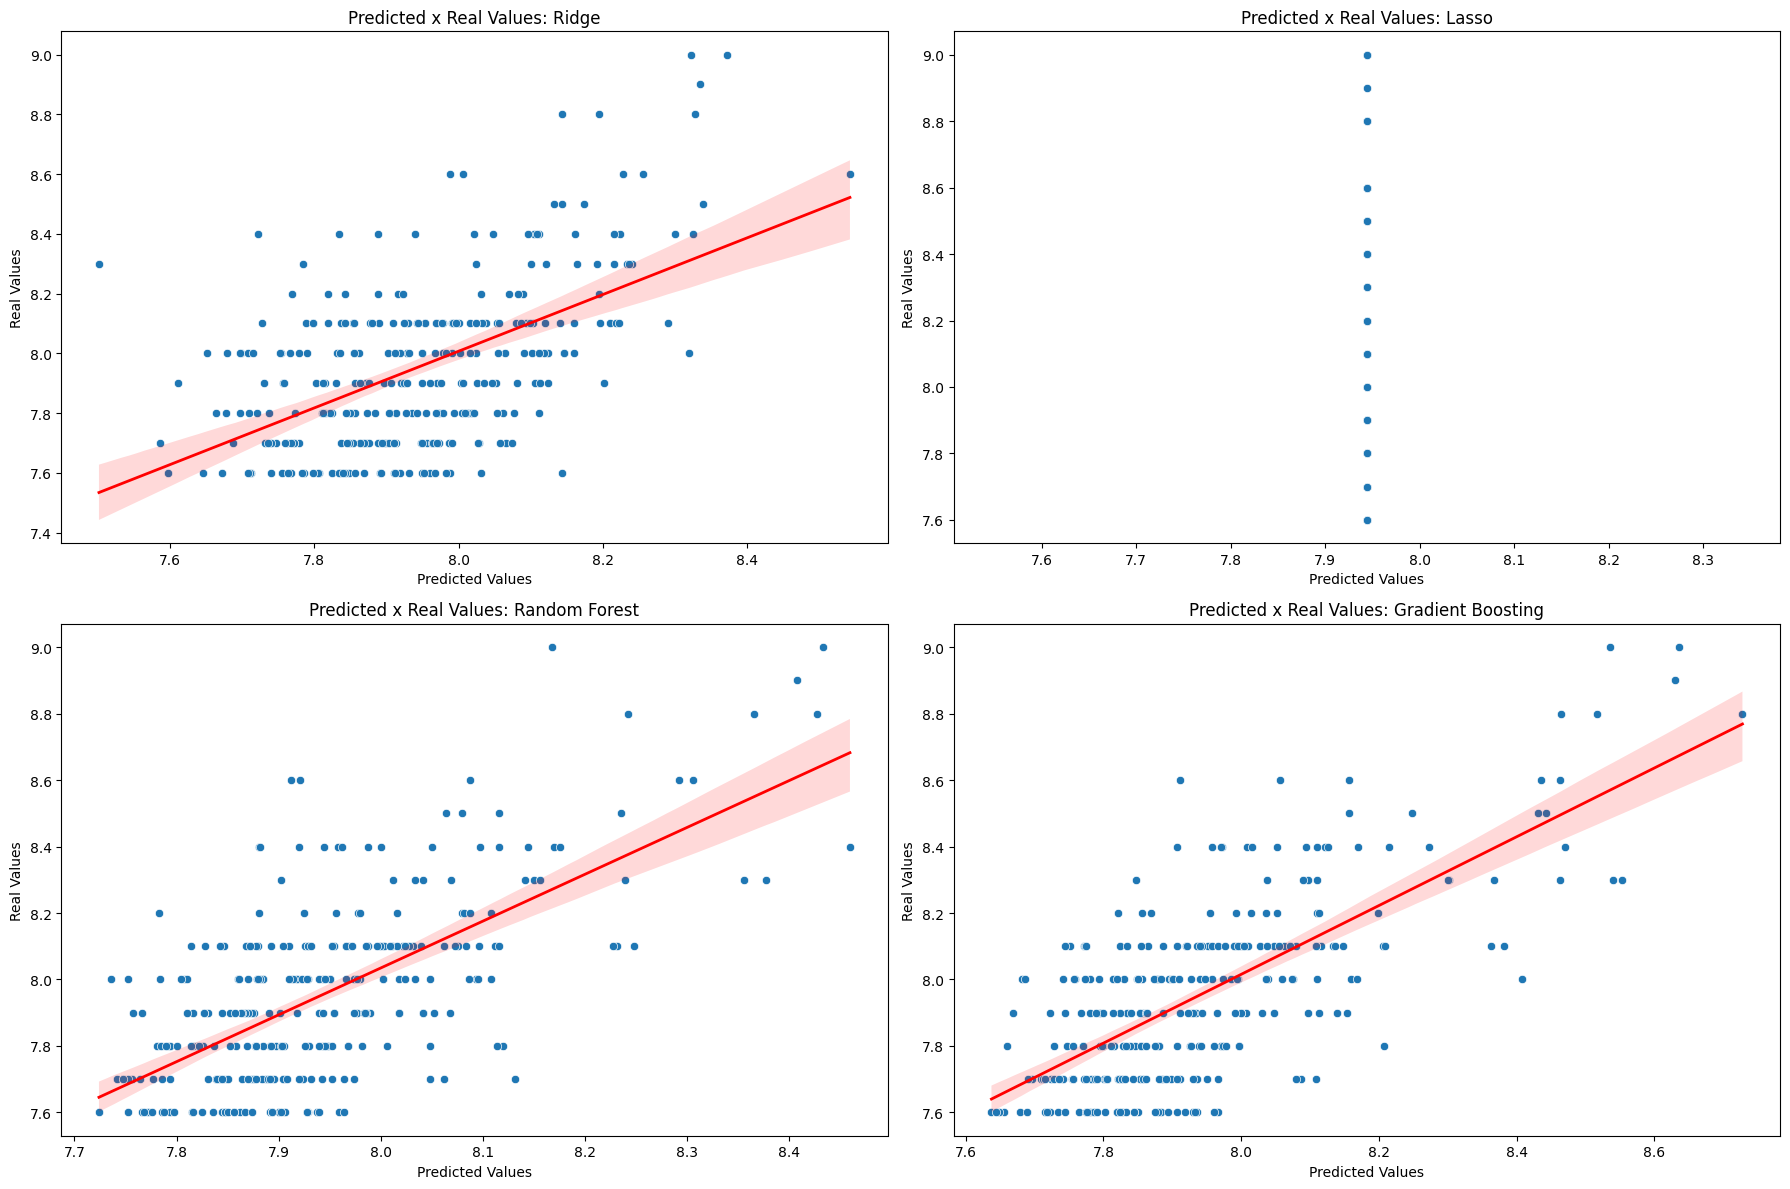

In [18]:
metrics.plot_pred_x_real(y_test_onehot, 2, 2)

In [19]:
df_onehot_metrics = pd.DataFrame.from_dict(model_report_onehot, orient='index')
df_onehot_metrics.drop(columns=["model", "y_pred"])

,mae,rmse,r2
Ridge,0.185367,0.232336,0.303086
Lasso,0.219102,0.278587,-0.002005
Random Forest,0.170332,0.215124,0.402519
Gradient Boosting,0.153958,0.193818,0.515005


### Observations:
- All models apart from Lasso had a very similar performance regarding MAE, and all of them struggle to correctly predict ratings that are too high, likely due to the fact that there are few movies with such high ratings, and this is a very small dataset
- Ridge and Lasso showed different performances, with the Ridge regularization term being able to handle the non-linear relations
- The ensemble models had a small improvement in performance regarding MAE but showed a big improvement in the R² score
- Based on the metrics, the Gradient Boosting model is the best one, with the lowest errors and the highest R² score

## Residual Analysis

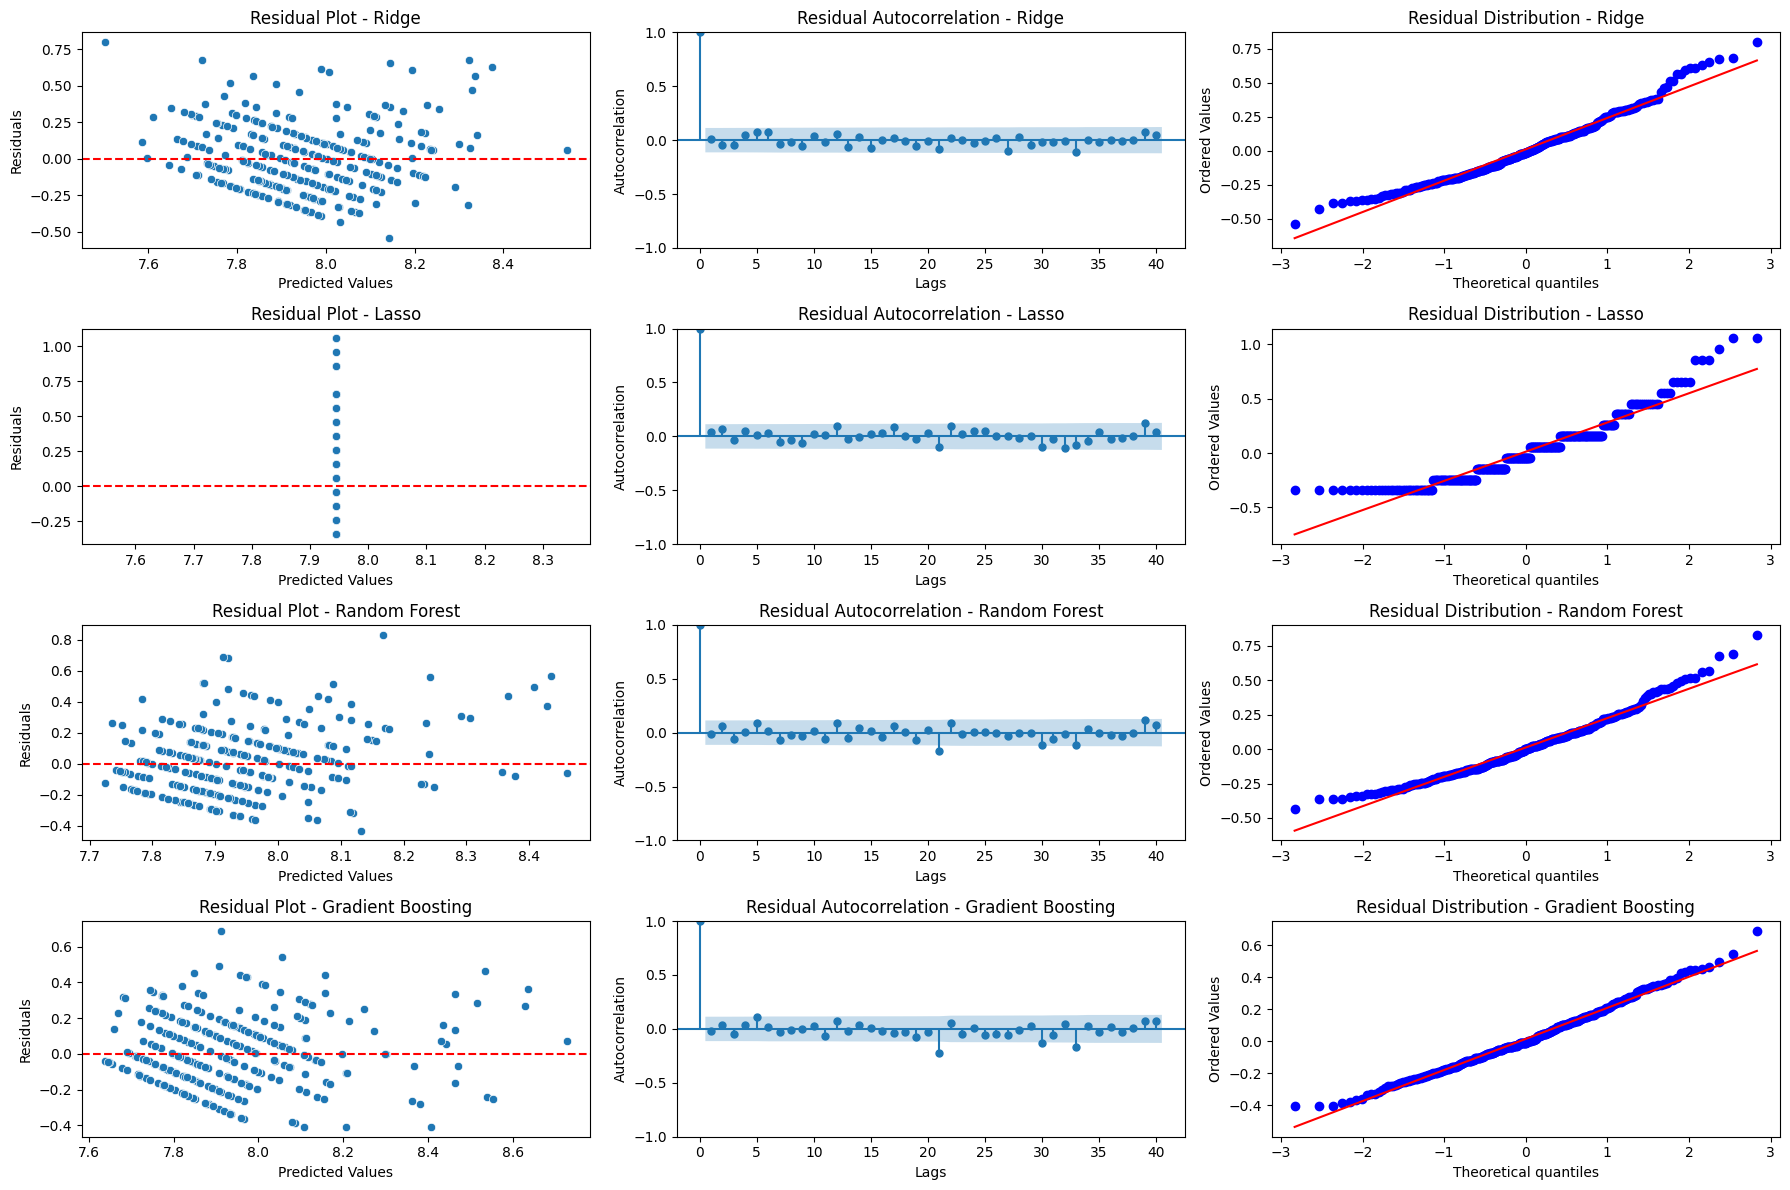

In [20]:
metrics.plot_residuals(y_test_onehot, 4, 3)

### Observations:
- The residuals of all models behave basically in the same way, apart from Lasso
- No model has autocorrelated residuals, indicating that the errors of the model are independent of each other, which can be considered a good thing, since this tends to show that the model has captured the pattern in the data with only noise in the residuals
- Despite no autocorrelation, only the Gradient Boosting model was able to have residuals with what seems to be a normal distribution, indicating that it's capturing the full variability of the data
- With a combination of non-normal residuals and low R² scores, apart from the Gradient Boosting with normal residuals but a mediocre to low R² score, it's clear that no model was able to capture all non-linear relations between the data, and they are not ideal models, statistically speaking, with Gradient Boosting being the best one

## Feature Importance

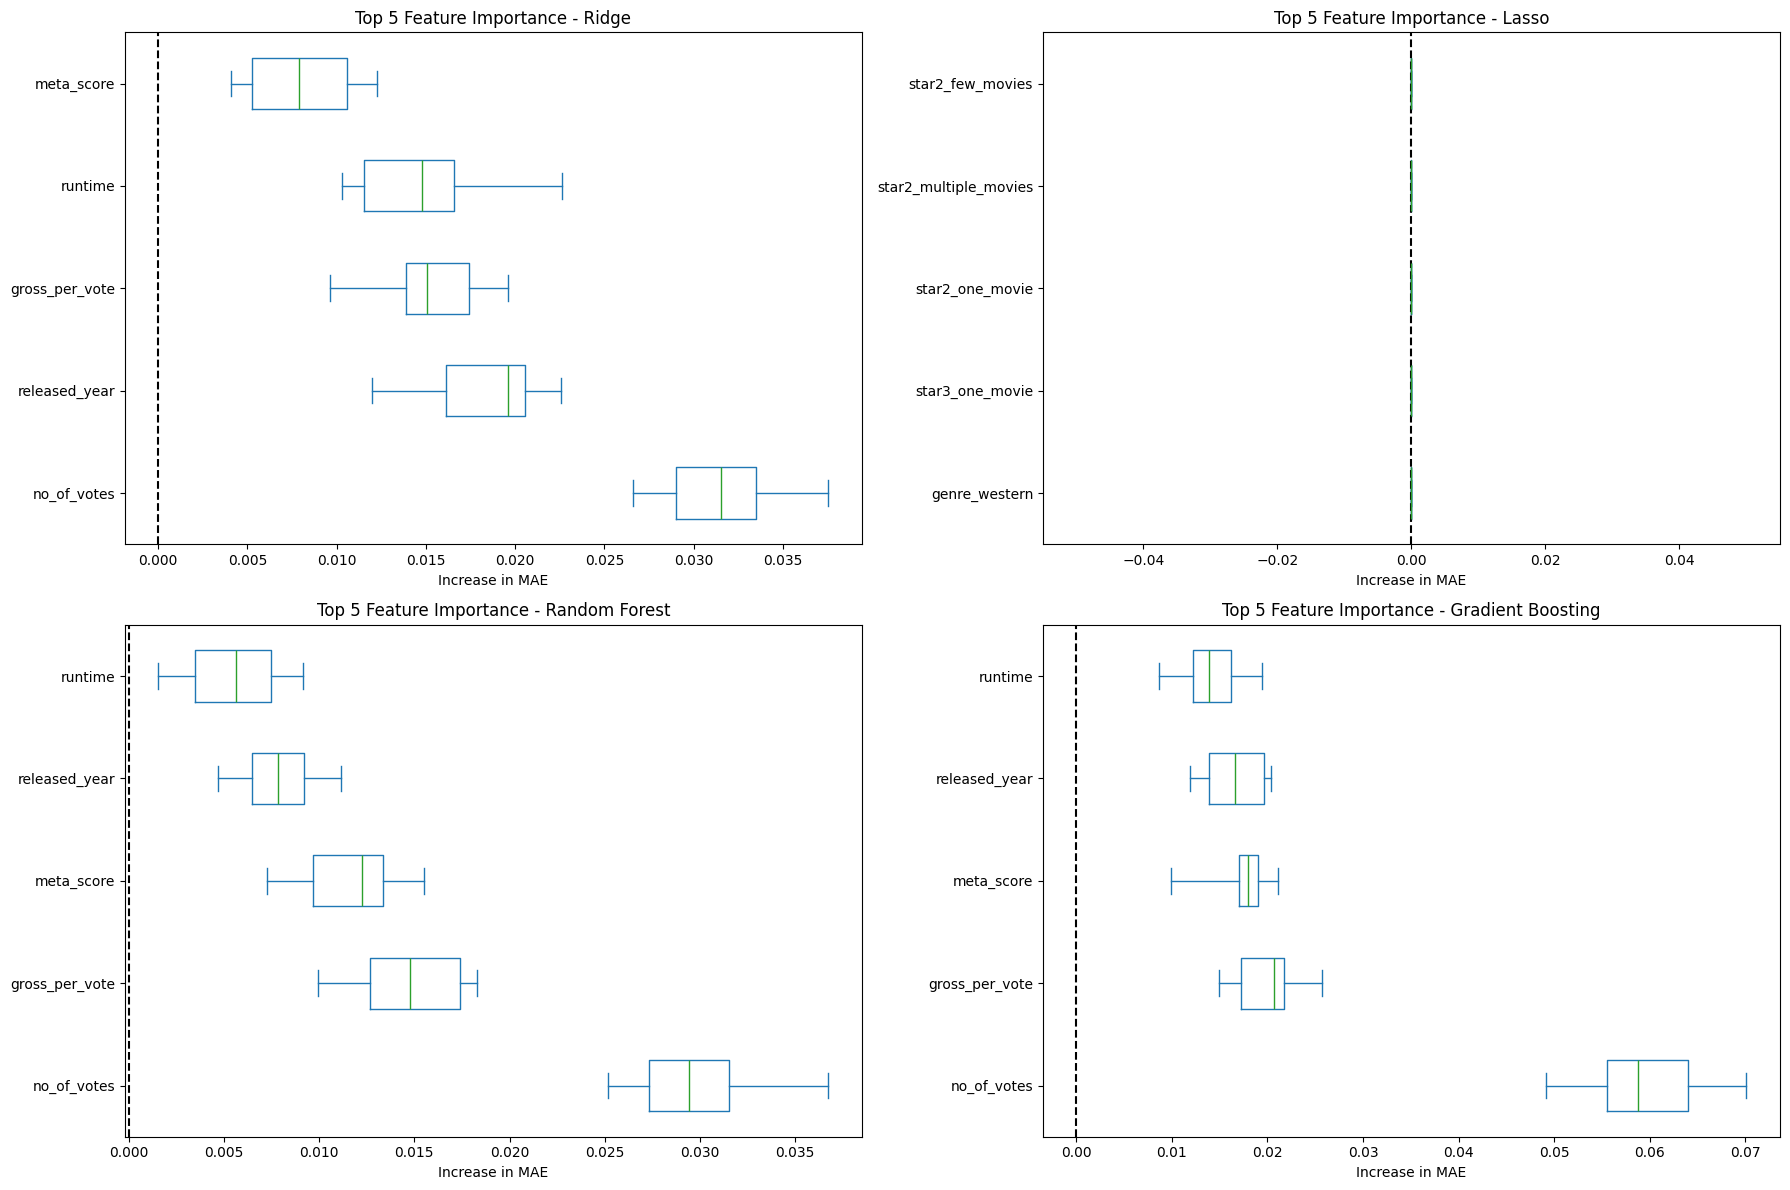

In [21]:
metrics.plot_feature_importance(y_test=y_test_onehot, X_test=X_test_onehot, metric="neg_mean_absolute_error", rows=2, columns=2)

### Observations:
- Dispite what was seen in the EDA, runtime was a very important feature for all models, apart for Lasso
- Ridge, Random Forest and Gradient Boosting have the same top 5 most important features
- Apart from Lasso, all models have the created feature `gross_per_vote` in their top 5 most important features, this means that these models rely on the correct values of this feature to make predictions. When permutation is applied to this feature, the impact on **MAE** is very low, making this feature very important

# Model Training for label encoded dataframe

In [11]:
model_report_label = trainer.initiate_model_trainer((X_train_label, y_train_label, X_test_label, y_test_label), "Label_encoded_dataset")

2024/07/08 17:00:58 INFO mlflow.tracking.fluent: Experiment with name 'Label_encoded_dataset' does not exist. Creating a new experiment.
Successfully registered model 'Ridge - Label_encoded_dataset'.
2024/07/08 17:01:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge - Label_encoded_dataset, version 1
Created version '1' of model 'Ridge - Label_encoded_dataset'.
Successfully registered model 'Lasso - Label_encoded_dataset'.
2024/07/08 17:01:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Lasso - Label_encoded_dataset, version 1
Created version '1' of model 'Lasso - Label_encoded_dataset'.
Successfully registered model 'Random Forest - Label_encoded_dataset'.
2024/07/08 17:02:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - Label_enc

## Model Performance

In [12]:
metrics = MetricsVisualizations(model_report_label)

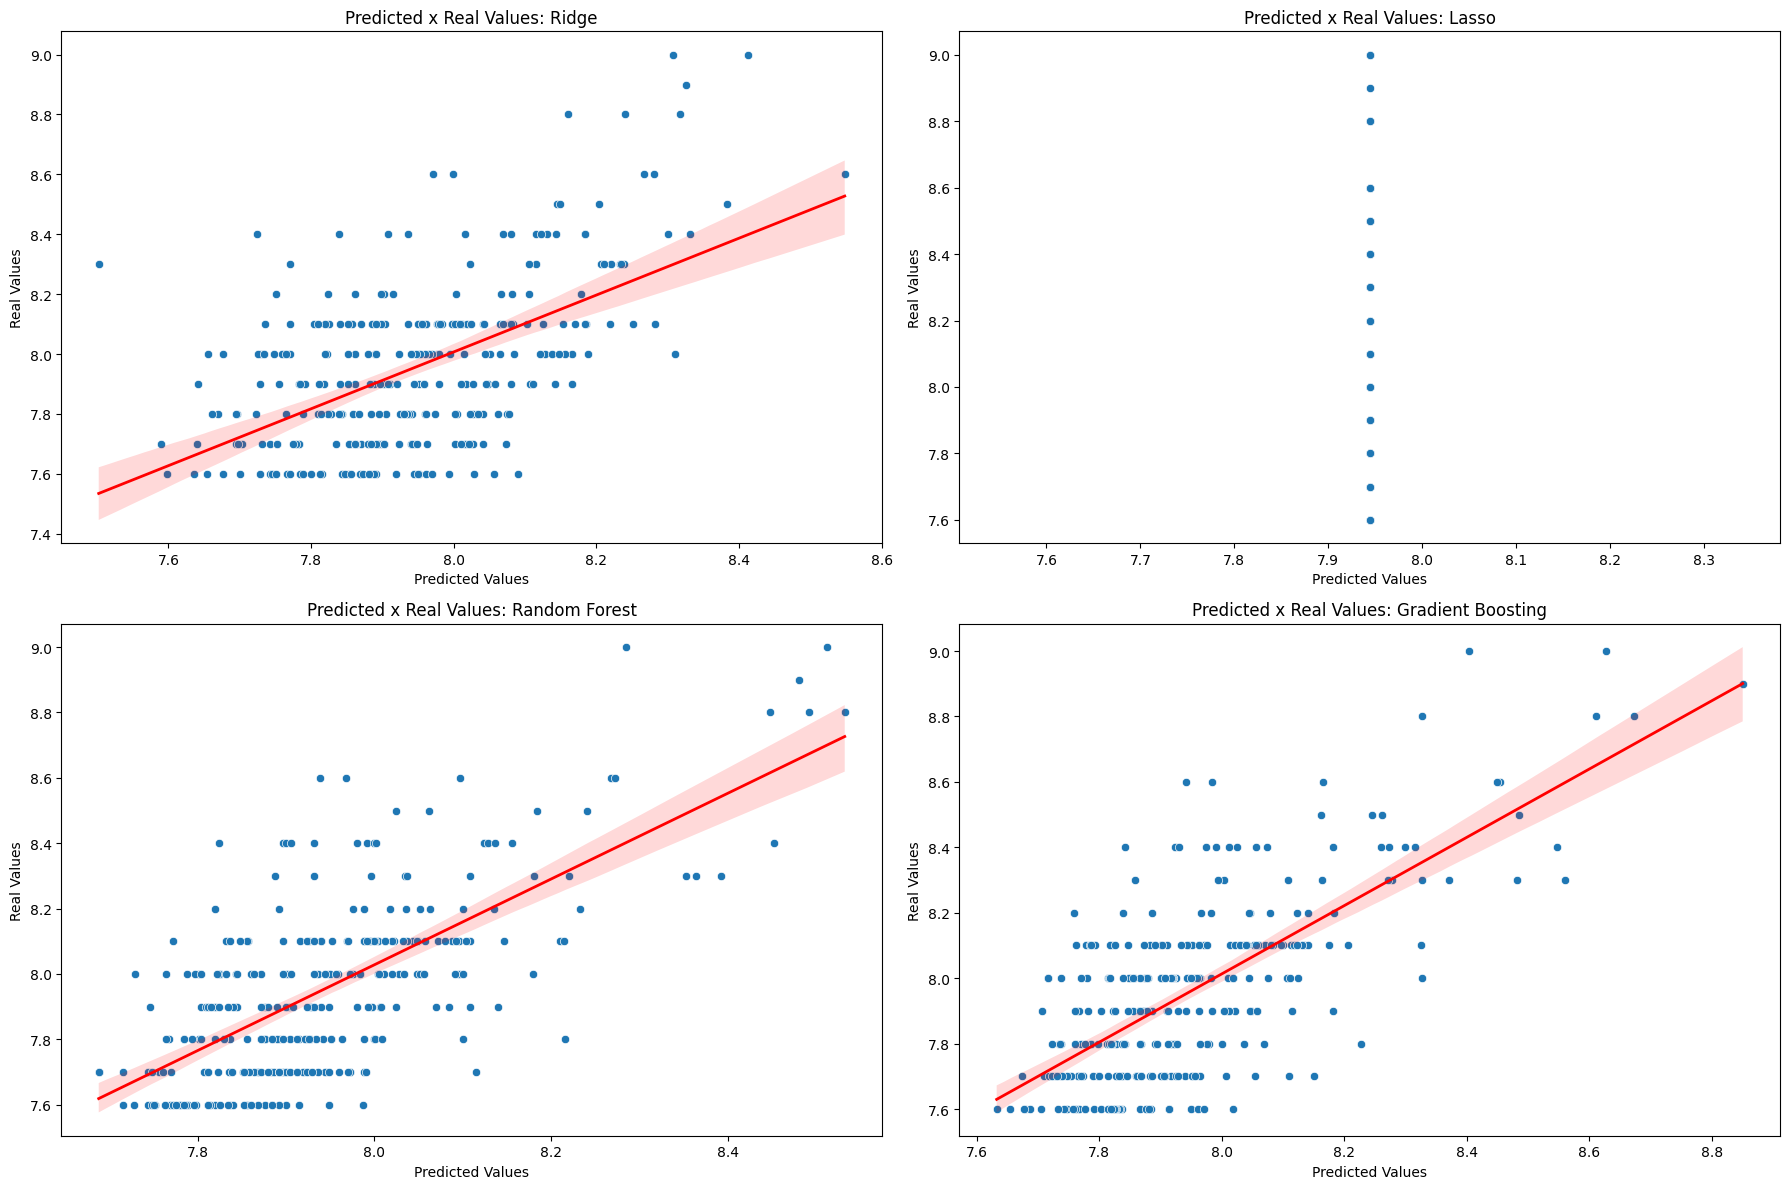

In [13]:
metrics.plot_pred_x_real(y_test_label, 2, 2)

In [14]:
df_label_metrics = pd.DataFrame.from_dict(model_report_label, orient='index')
df_label_metrics.drop(columns=["model", "y_pred"])

,mae,rmse,r2
Ridge,0.184132,0.230889,0.311735
Lasso,0.219102,0.278587,-0.002005
Random Forest,0.163394,0.206214,0.450985
Gradient Boosting,0.152900,0.196542,0.501280


### Observations:
- All models show similar performance and metrics, with the only major difference being the Random Forest R² score, which went from 0.4 to 0.45 now

## Residual Analysis

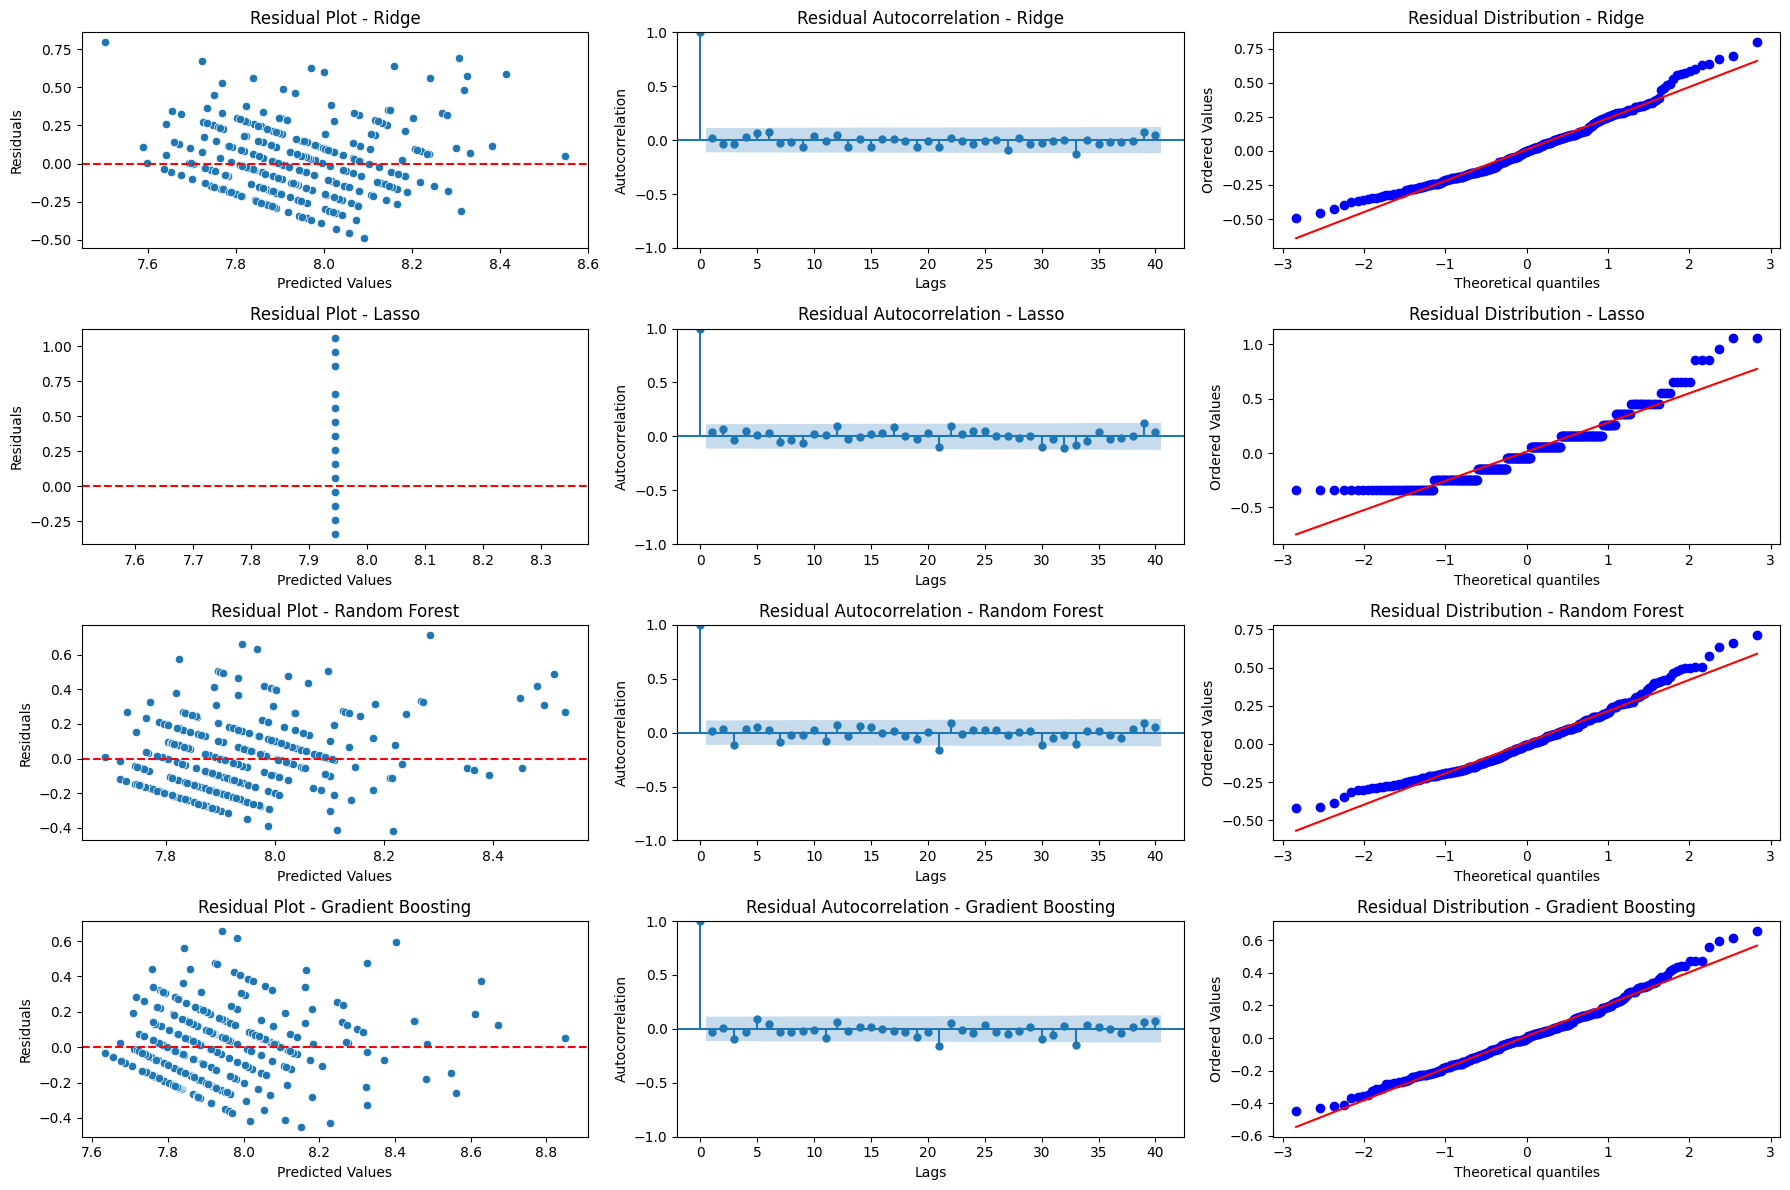

In [15]:
metrics.plot_residuals(y_test_label, 4, 3)

### Observations:
- The residuals for all models behave the same way as the residuals of the models using the onehot encoded dataframe

## Feature Importance

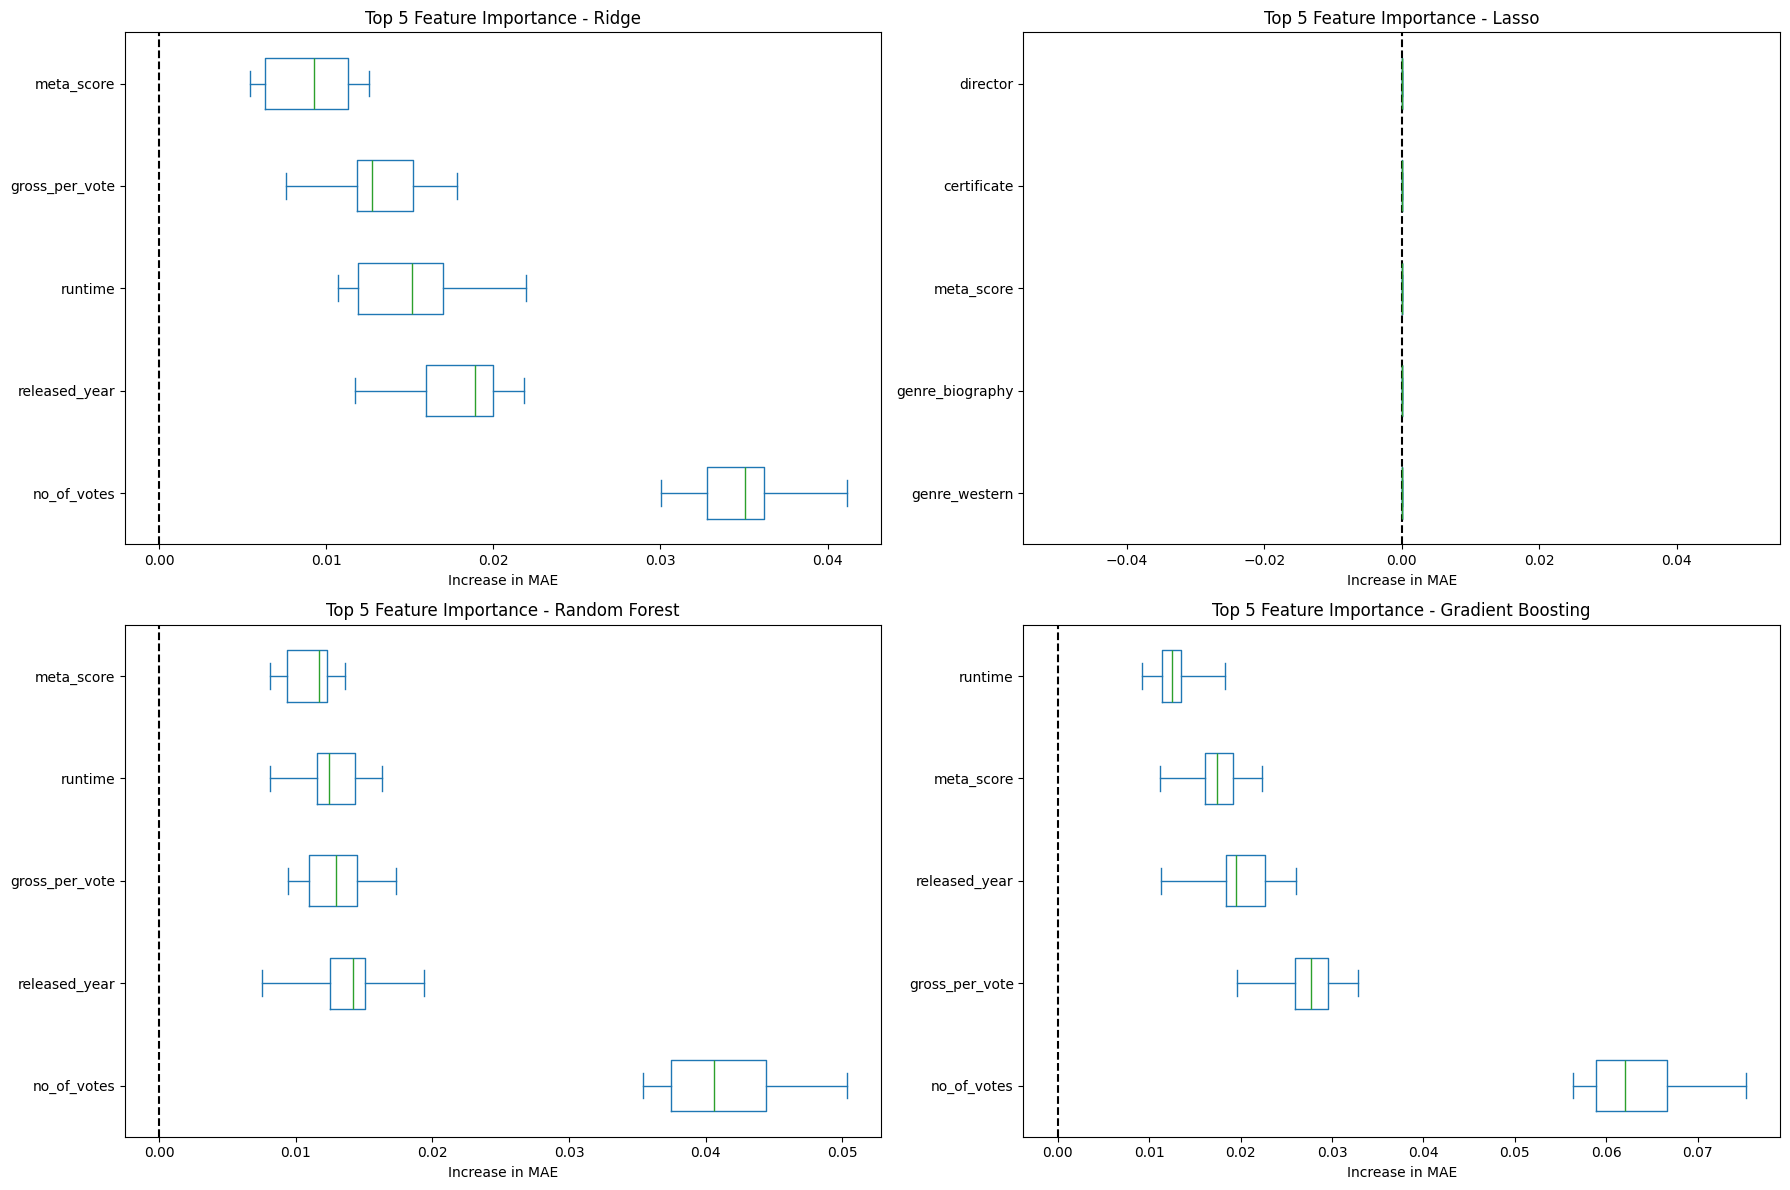

In [16]:
metrics.plot_feature_importance(y_test=y_test_label, X_test=X_test_label, metric="neg_mean_absolute_error", rows=2, columns=2)

### Observations:
- All models repeat the same conclusions found when using the onehot encoded dataset. The major difference is the order of the top 5 features for each model, but only the order since the features are the same

## Conclusion

### All models had pretty similar results, with the ensemble ones having lower error scores. No model was considered ideal by the residual analysis, since there were no normally distributed residuals (with Gradient Boosting getting close), which, combined with low R² scores, shows that no model was able to handle all non-linear relations between the data, nor was it able to capture the full variability of the data
### When looking at feature importance, the engineered feature `gross_per_vote` appeared in the top 5 most important features of all models, rendering the feature engineering efforts a success
### Despite no model being considered ideal and the low R² scores, the best model in terms of metrics was the Gradient Boosting one, with the onehot encoded dataframe. It had the lowest **MAE** and **RSME**, and highest **R²**

# Loading and saving the best model

In [10]:
trainer.save_model("Gradient Boosting - Onehot_encoded_dataset", "../artifacts", "model")

GradientBoostingRegressor(max_depth=5, max_features='sqrt', random_state=42)
